---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 6

---
Please write your full name here
- **Name** : "Ibrahim Mohamed"

# Part 1 PCA

In [257]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline


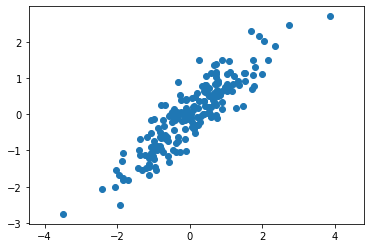

In [258]:
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [259]:
#### YOUR FUNCTION
def pca(X):
    # Center the data
    centered_data = X - np.mean(X, axis=0)

    # covariance matrix
    cov_matrix = np.cov(centered_data.T)

    # extarct eigenvectors and eigenvalues of the covariance matrix
    sorted_eigenvalue, sorted_eigenvectors = np.linalg.eig(cov_matrix)

    # Sort descending order
    idx = sorted_eigenvalue.argsort()[::-1]
    sorted_eigenvalue = sorted_eigenvalue[idx]
    sorted_eigenvectors = sorted_eigenvectors[:, idx]

    # Transform the data
    X_transformed = np.dot(centered_data, sorted_eigenvectors)

    return sorted_eigenvectors, sorted_eigenvalue, X_transformed

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA vectors over the ORIGINAL data

In [260]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalues, X_transformed = pca(X) 

In [261]:
print("Eigenvalues are: ", sorted_eigenvalues)

Eigenvalues are:  [1.82927343 0.10246373]


In [262]:
print("Eigenvectors are: ", sorted_eigenvectors)

Eigenvectors are:  [[ 0.74306799 -0.66921593]
 [ 0.66921593  0.74306799]]


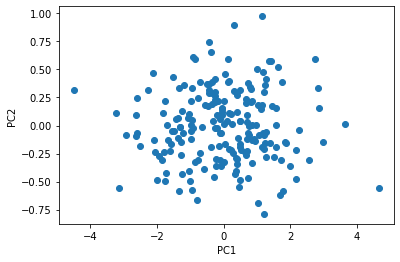

In [263]:
### Plot transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

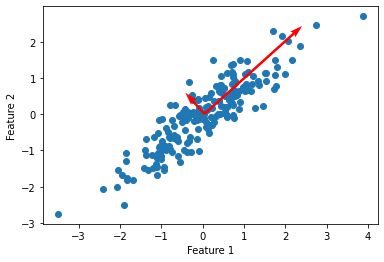

In [264]:
### Plot eigenvectors over ORIGINAL data

# Plot the original data
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the eigenvectors
origin = np.mean(X, axis=0)

for i in range(len(sorted_eigenvectors)):
    plt.quiver(origin[0], origin[1], sorted_eigenvectors[0, i], sorted_eigenvectors[1, i], color=['r', 'b'], scale=1/sorted_eigenvalues[i] + 2)

plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

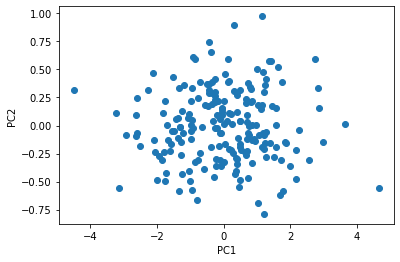

[[ 0.74306799  0.66921593]
 [-0.66921593  0.74306799]]


[1.82927343 0.10246373]


In [265]:
from sklearn.decomposition import PCA

pca = PCA()
transformed_data_sklearn = pca.fit_transform(X)

# Plot the transformed data from sklearn PCA
plt.scatter(transformed_data_sklearn[:, 0], transformed_data_sklearn[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Print eigenvectors and eigenvalues of sklearn PCA
print(pca.components_)
print('\n')
print(pca.explained_variance_)

## Question 4
- Apply sklearn PCA using 1 component only
- print shape of transformed data
- plot the transformed data

In [266]:
pca_1_comp = PCA(n_components=1)
transformed_data_one_component = pca_1_comp.fit_transform(X)

# shape of the transformed data
print(transformed_data_sklearn.shape)

(200, 2)


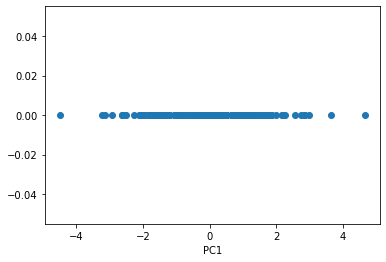

In [267]:
# Plot the transformed data
plt.scatter(transformed_data_one_component, np.zeros_like(transformed_data_one_component))
plt.xlabel('PC1')
plt.show()

 # Part 2 SVM

### Use the following function to plot the classification regions

In [268]:
import matplotlib.patches as mpatches

def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [269]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=42 and 20% of the data for testing)

In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Question 2
1. Train an SVM classifier using linear kernel (use SVC)
2. Plot the classification regions using the training dataset.

In [271]:
from sklearn.svm import SVC


# Assuming X_train and y_train are the training data and labels
svm_q2 = SVC(kernel='linear')
svm_q2.fit(X_train, y_train)

SVC(kernel='linear')

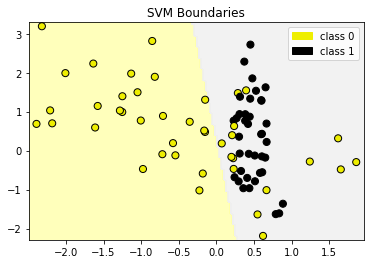

In [272]:
plot_class_regions_for_classifier(svm_q2, X_train, y_train, title= "SVM Boundaries" ,plot_decision_regions=True, target_names=['class 0', 'class 1'])

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00002.
2. Train another SVM classifier using linear kernel with C=200
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

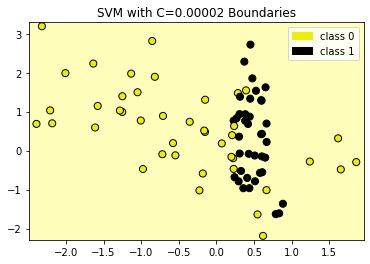

In [273]:
svm_q3_c1 = SVC(kernel='linear', C=0.00002)
svm_q3_c1.fit(X_train, y_train)
plot_class_regions_for_classifier(svm_q3_c1, X_train, y_train, title= "SVM with C=0.00002 Boundaries" ,plot_decision_regions=True, target_names=['class 0', 'class 1'])

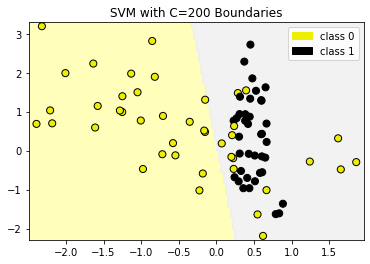

In [274]:
svm_q3_c2 = SVC(kernel='linear', C=200)
svm_q3_c2.fit(X_train, y_train)
plot_class_regions_for_classifier(svm_q3_c2, X_train, y_train, title= "SVM with C=200 Boundaries" ,plot_decision_regions=True, target_names=['class 0', 'class 1'])

## Comment
When C was bigger the model had better results and was able to classify the data better. this are shown in the plots above. as C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. so when the C is bigger the model will try to classify the data correctly even if the decision boundary is not smooth. and when C is smaller the model will try to make the decision boundary smooth even if it will not classify the data correctly.

### Use the fruits dataset in questions 4, 5, 6.

In [275]:
import pandas as pd
fruits = pd.read_table('./data/Ibrahim Mohamed - fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

In [276]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=42, and 20% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm using random_state=42, C=10

In [277]:
X_fruits = fruits.drop(['fruit_label', 'fruit_name'], axis=1)
y_fruits = fruits['fruit_label']

In [278]:
from sklearn.model_selection import train_test_split

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_fruits_2d_train, X_fruits_2d_test, y_fruits_2d_train, y_fruits_2d_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state=42, test_size=0.2)

In [279]:
from sklearn.svm import LinearSVC

svm_q4 = LinearSVC(random_state=42, C=10)
svm_q4.fit(X_fruits_2d_train, y_fruits_2d_train)

C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, random_state=42)

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

Four models has been trained because LinearSVC is a one-vs-rest classifier
So we have 4 classes and for each class we have a model.


In [280]:
print('Coefficients:\n', svm_q4.coef_)
print('Intercepts:\n', svm_q4.intercept_)

Coefficients:
 [[-0.22459715  0.76048347]
 [-1.70338354  1.18717003]
 [-0.0062549   0.3183943 ]
 [ 1.14746624 -1.71656282]]
Intercepts:
 [-3.42751628  1.46849592 -3.01719598  1.66954999]


#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

C:\Users\I1bra\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


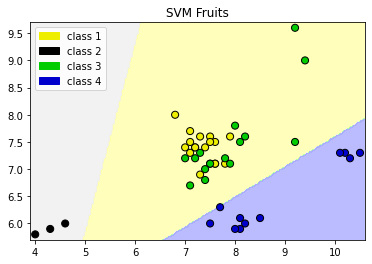

In [294]:
plot_class_regions_for_classifier(svm_q4, X_fruits_2d_train.values, y_fruits_2d_train.values, title= "SVM Fruits" ,plot_decision_regions=True, target_names=['class 1', 'class 2', 'class 3', 'class 4'])

In [282]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 42, and 20% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM  (SVC) classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
X_breast_train, X__breast_test, y_breast_train, y_breast_test = train_test_split(X_cancer, y_cancer, random_state=42, test_size=0.2)


In [284]:
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
svc_q7 = SVC()
clf = GridSearchCV(svc_q7, parameters)
clf.fit(X_breast_train, y_breast_train)
print("Best parameters are :")
print(clf.best_params_)

Best parameters are :
{'C': 10, 'kernel': 'poly'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [285]:
svc_q8 = SVC(kernel='poly', C=10)
svc_q8.fit(X_breast_train, y_breast_train)

SVC(C=10, kernel='poly')

In [286]:
print('Accuracy of SVC on training set: {:.2f}'
     .format(svc_q8.score(X_breast_train, y_breast_train)))

print('Accuracy of SVC on test set: {:.2f}'
        .format(svc_q8.score(X__breast_test, y_breast_test)))


Accuracy of SVC on training set: 0.92
Accuracy of SVC on test set: 0.93


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [287]:
from sklearn.preprocessing import StandardScaler

# Made Data Scaling as preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cancer)

X_preproccssed_train, X_preproccssed_test, y_preproccssed_train, y_preproccssed_test = train_test_split(X_scaled, y_cancer, test_size=0.2, random_state=42)


In [288]:
svc_q9 = SVC(kernel='poly', C=10)
svc_q9.fit(X_preproccssed_train, y_preproccssed_train)

SVC(C=10, kernel='poly')

In [289]:
print('Accuracy of SVC on training set: {:.2f}'
     .format(svc_q9.score(X_preproccssed_train, y_preproccssed_train)))
print('Accuracy of SVC on test set: {:.2f}'
     .format(svc_q9.score(X_preproccssed_test, y_preproccssed_test)))

Accuracy of SVC on training set: 0.97
Accuracy of SVC on test set: 0.96
